# 분석 환경 세팅

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
## 셀에서 값을 모두 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Image

In [3]:
## 설정
# 지수표기법 대신 숫자표기법
pd.options.display.float_format = '{:.2f}'.format

# 스타일
plt.style.use('seaborn-v0_8-darkgrid')

# 폰트
from matplotlib import font_manager
# - 맑은고딕 보통과 굵은 글꼴 경로
font_path_regular = "C:/Windows/Fonts/malgun.ttf"  # 맑은고딕 보통
font_path_bold = "C:/Windows/Fonts/malgunbd.ttf"  # 맑은고딕 굵게

# - 폰트 추가
font_manager.fontManager.addfont(font_path_regular)
font_manager.fontManager.addfont(font_path_bold)

# - 기본 폰트 설정 (맑은고딕 보통을 기본 폰트로 설정)
plt.rc('font', family='Malgun Gothic')  # 기본 폰트는 보통

# - 음수 부호 표시 설정
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 제대로 표시

# 데이터 프레임의 모든 레코드 출력
def print_all(obj, n=None):
    pd.set_option('display.max_row', n)
    display(obj)
    pd.set_option('display.max_row', 10)

# 모든 칼럼 출력
pd.set_option('display.max_columns', None)

In [4]:
custom_palette = [
    'tomato', 'royalblue', 'mediumseagreen', 'goldenrod', 'orchid', 
    'slategray', 'dodgerblue', 'darkorange', 'turquoise', 'firebrick', 'mediumvioletred'
]

# 데이터 로드 및 전처리

In [109]:
origin_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# 데이터 로드
origin_df = pd.read_csv('데이터셋\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 기본 확인
origin_df.columns = origin_df.columns.str.strip()  # 공백 제거
origin_df.dropna(subset=["TotalCharges"], inplace=True)
origin_df["TotalCharges"] = pd.to_numeric(origin_df["TotalCharges"], errors="coerce")

# 불필요한 ID 컬럼 제거
origin_df.drop(columns=["customerID"], inplace=True)

# TotalCharges 결측치 처리 (가입 당월에 바로 해지 고객)
origin_df['TotalCharges'] = origin_df['TotalCharges'].fillna(0)

In [21]:
# 데이터 요약

def summary_df(df):
  summary = {
      '변수명':[],
      '데이터 타입':[],
      '결측치 개수':[],
      '유니크 데이터 수':[],
      '첫 번째 레코드 값':[],
      '두 번째 레코드 값':[]
  }

  for col in df.columns:
    summary['변수명'].append(col)
    summary['데이터 타입'].append(df[col].dtype)
    summary['결측치 개수'].append(df[col].isna().sum())
    summary['유니크 데이터 수'].append(df[col].nunique())
    summary['첫 번째 레코드 값'].append(df[col].iloc[0] if len(df) > 0 else None)
    summary['두 번째 레코드 값'].append(df[col].iloc[1] if len(df) > 1 else None)

  summary_df = pd.DataFrame(summary)
  return summary_df


summary_df(origin_df)

,변수명,데이터 타입,결측치 개수,유니크 데이터 수,첫 번째 레코드 값,두 번째 레코드 값
0,gender,object,0,2,Female,Male
1,SeniorCitizen,int64,0,2,0,0
2,Partner,object,0,2,Yes,No
3,Dependents,object,0,2,No,No
4,tenure,int64,0,73,1,34
5,PhoneService,object,0,2,No,Yes
6,MultipleLines,object,0,3,No phone service,No
7,InternetService,object,0,3,DSL,DSL
8,OnlineSecurity,object,0,3,No,Yes
9,OnlineBackup,object,0,3,Yes,No


# 1. 고객군 특성 분석

In [112]:
df = origin_df.copy()
df['Churn_num'] = df['Churn'].map({'No':0, 'Yes':1})

<Figure size 600x400 with 0 Axes>

C:\Users\sangw\AppData\Local\Temp\ipykernel_55836\3069033783.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Churn', palette=custom_palette[:2])
C:\Users\sangw\AppData\Local\Temp\ipykernel_55836\3069033783.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

Text(0.5, 1.0, '분석기간 내 이탈자 vs 잔존자 분포')

Text(0.5, 0, '서비스 이탈 여부')

Text(0, 0.5, '고객 수')

(0.0, 5500.0)

Text(0.0, 5224.0, '5174')

Text(1.0, 1919.0, '1869')

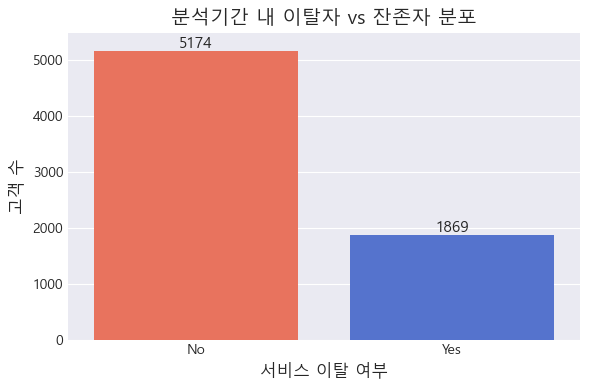

In [22]:
## 이탈자 vs 잔존자 시각화
# Churn 값 분포 확인 및 시각화
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Churn', palette=custom_palette[:2])

# 그래프 제목 및 라벨
ax.set_xticklabels(['No', 'Yes'])
plt.title('분석기간 내 이탈자 vs 잔존자 분포', fontsize=14)
plt.xlabel('서비스 이탈 여부', fontsize=12)
plt.ylabel('고객 수', fontsize=12)
plt.ylim([0, 5500])

# 각 막대 위에 숫자 표시
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 50, f'{height:.0f}', 
                   ha='center', fontsize=11)

plt.tight_layout()
plt.show()

In [24]:
df_copy = df.copy()

# 이탈 여부 숫자로 되어 있으면 문자로 변환
if df_copy['Churn'].dtype != 'O':
    df_copy['Churn'] = df_copy['Churn'].map({0: 'No', 1: 'Yes'})

# tenure 범주화
bins = [0, 12, 24, 48, 60, df_copy['tenure'].max()]
labels = ['0-12 개월', '13-24 개월', '25-48 개월', '49-60 개월', '61 개월월+']
df_copy['TenureGroup'] = pd.cut(df_copy['tenure'], bins=bins, labels=labels, include_lowest=True)

In [75]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

<Figure size 600x400 with 0 Axes>

C:\Users\sangw\AppData\Local\Temp\ipykernel_28916\199291573.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['월 단위\n(3,875명)', '1년 계약\n(1,695명)', '2년 계약\n(1,473명)'])


[Text(0, 0, '월 단위\n(3,875명)'),
 Text(1, 0, '1년 계약\n(1,695명)'),
 Text(2, 0, '2년 계약\n(1,473명)')]

Text(0.5, 1.0, '계약 형태별 이탈률')

Text(0, 0.5, '이탈률 (%)')

Text(0, 43.70967741935484, '42.7%')

Text(1, 12.269517990495586, '11.3%')

Text(2, 3.831858407079646, '2.8%')

(0.0, 52.70967741935484)

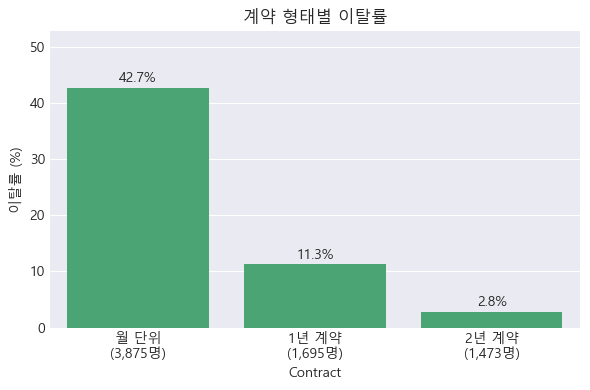

In [77]:
# 계약 형태별 이탈률
plt.figure(figsize=(6, 4))
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
ax = sns.barplot(x=contract_churn.index, y=contract_churn.values, color=custom_palette[2])

ax.set_xticklabels(['월 단위\n(3,875명)', '1년 계약\n(1,695명)', '2년 계약\n(1,473명)'])
plt.title('계약 형태별 이탈률')
plt.ylabel('이탈률 (%)')
for i, val in enumerate(contract_churn.values):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')
plt.ylim(0, contract_churn.max() + 10)
plt.tight_layout()
plt.show()

In [78]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

<Figure size 600x400 with 0 Axes>

C:\Users\sangw\AppData\Local\Temp\ipykernel_28916\2720595894.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No\n(2,872명)', 'Yes\n(4,171명)'])


[Text(0, 0, 'No\n(2,872명)'), Text(1, 0, 'Yes\n(4,171명)')]

Text(0.5, 1.0, '자동이체 여부별 이탈률')

Text(0, 0.5, '이탈률 (%)')

Text(0, 17.33008356545961, '16.3%')

Text(1, 34.565092304003834, '33.6%')

(0.0, 43.565092304003834)

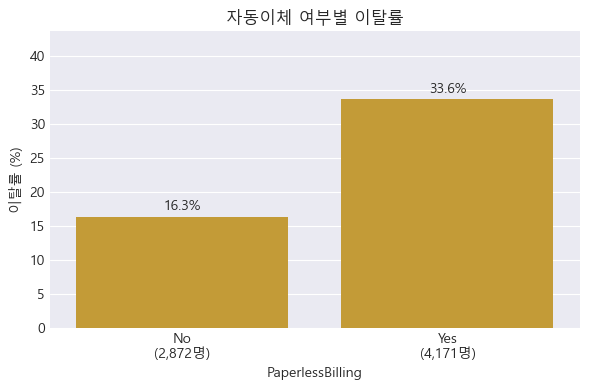

In [79]:
# 자동 이체 여부별별
plt.figure(figsize=(6, 4))
billing_churn = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
ax = sns.barplot(x=billing_churn.index, y=billing_churn.values, color=custom_palette[3])



ax.set_xticklabels(['No\n(2,872명)', 'Yes\n(4,171명)'])
plt.title('자동이체 여부별 이탈률')
plt.ylabel('이탈률 (%)')
for i, val in enumerate(billing_churn.values):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')
plt.ylim(0, billing_churn.max() + 10)
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

C:\Users\sangw\AppData\Local\Temp\ipykernel_55836\3308754978.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes', 'Other'])


[Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'Other')]

Text(0.5, 1.0, 'TV 스트리밍 서비스 사용 여부별 이탈률')

Text(0, 0.5, '이탈률 (%)')

Text(0, 34.52313167259787, '33.5%')

Text(1, 8.404980340760158, '7.4%')

Text(2, 31.070188400443293, '30.1%')

(0.0, 43.52313167259787)

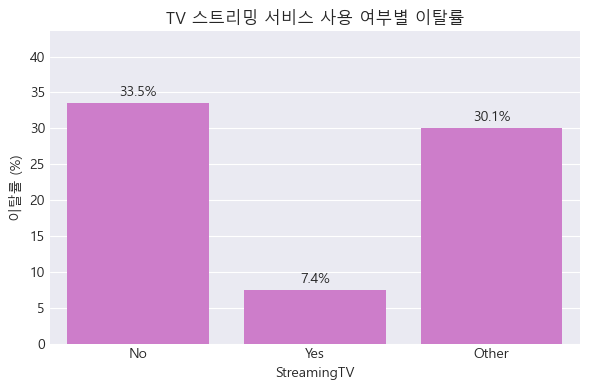

In [41]:
# 4. TV 스트리밍 서비스 여부별
plt.figure(figsize=(6, 4))
tv_churn = df_copy.groupby('StreamingTV')['Churn'].value_counts(normalize=True).unstack().fillna(0)['Yes'] * 100
ax = sns.barplot(x=tv_churn.index, y=tv_churn.values, color=custom_palette[4])

ax.set_xticklabels(['No', 'Yes', 'Other'])
plt.title('TV 스트리밍 서비스 사용 여부별 이탈률')
plt.ylabel('이탈률 (%)')
for i, val in enumerate(tv_churn.values):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')
plt.ylim(0, tv_churn.max() + 10)
plt.tight_layout()
plt.show()

In [81]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

<Figure size 600x400 with 0 Axes>

C:\Users\sangw\AppData\Local\Temp\ipykernel_28916\3675695971.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['남\n(3,555명)', '여\n(3,488명)'])


[Text(0, 0, '남\n(3,555명)'), Text(1, 0, '여\n(3,488명)')]

Text(0.5, 1.0, '성별 이탈률')

Text(0, 0.5, '이탈률 (%)')

Text(0, 27.920871559633024, '26.9%')

Text(1, 27.160337552742618, '26.2%')

(0.0, 36.92087155963303)

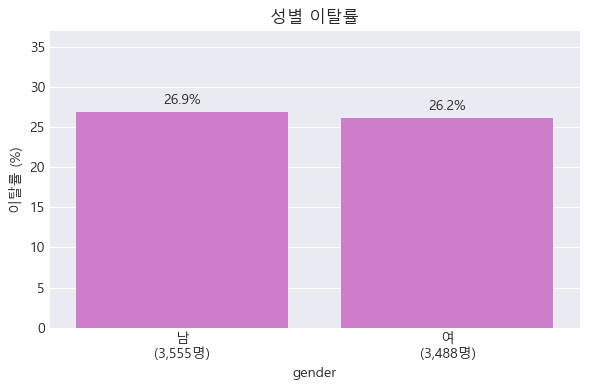

In [ ]:
#성성별
plt.figure(figsize=(6, 4))
gender_churn = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack().fillna(0)['Yes'] * 100
ax = sns.barplot(x=gender_churn.index, y=gender_churn.values, color=custom_palette[4])

ax.set_xticklabels(['남\n(3,555명)', '여\n(3,488명)'])
plt.title('성별 이탈률')
plt.ylabel('이탈률 (%)')
for i, val in enumerate(gender_churn.values):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')
plt.ylim(0, gender_churn.max() + 10)
plt.tight_layout()
plt.show()

In [86]:
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

<Figure size 600x400 with 0 Axes>

C:\Users\sangw\AppData\Local\Temp\ipykernel_28916\1961446071.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No\n(4,933명)', 'Yes\n(2,110명)'])


[Text(0, 0, 'No\n(4,933명)'), Text(1, 0, 'Yes\n(2,110명)')]

Text(0.5, 1.0, '부양가족 유무별 이탈률')

Text(0, 0.5, '이탈률 (%)')

Text(0, 32.279140482465024, '31.3%')

Text(1, 16.450236966824647, '15.5%')

(0.0, 41.279140482465024)

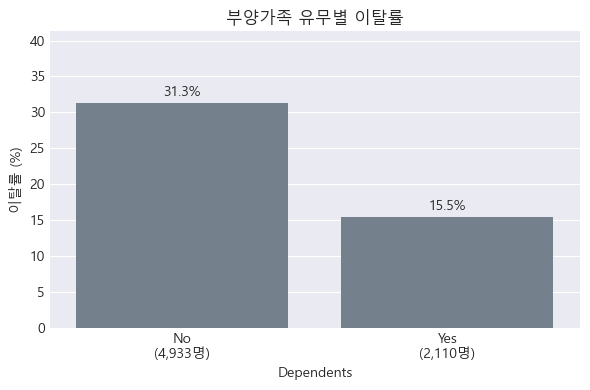

In [89]:
#성성별
plt.figure(figsize=(6, 4))
Dependents_churn = df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack().fillna(0)['Yes'] * 100
ax = sns.barplot(x=Dependents_churn.index, y=Dependents_churn.values, color=custom_palette[5])

ax.set_xticklabels(['No\n(4,933명)', 'Yes\n(2,110명)'])
plt.title('부양가족 유무별 이탈률')
plt.ylabel('이탈률 (%)')
for i, val in enumerate(Dependents_churn.values):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')
plt.ylim(0, Dependents_churn.max() + 10)
plt.tight_layout()
plt.show()

In [96]:
df['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

<Figure size 600x400 with 0 Axes>

C:\Users\sangw\AppData\Local\Temp\ipykernel_28916\21386445.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No\n(3,473명)', 'Yes\n(2,044명)'])


[Text(0, 0, 'No\n(3,473명)'), Text(1, 0, 'Yes\n(2,044명)')]

Text(0.5, 1.0, '부가서비스(인터넷 기술 지원) 이용 유무별 이탈률')

Text(0, 0.5, '이탈률 (%)')

Text(0, 37.0, '36.0%')

Text(1, 21.31356509884117, '20.3%')

(0.0, 46.0)

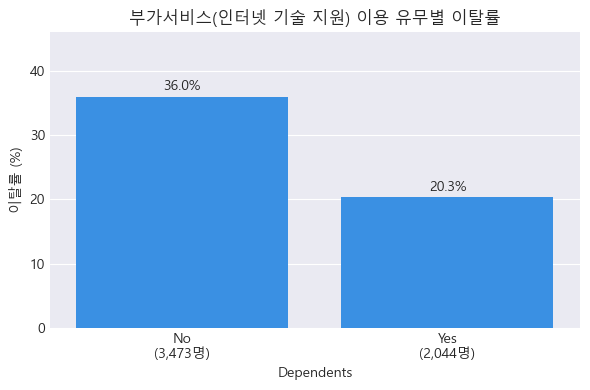

In [ ]:
plt.figure(figsize=(6, 4))
TechSupport_churn = df[df['TechSupport'] != 'No internet service'].groupby('Dependents')['Churn'].value_counts(normalize=True).unstack().fillna(0)['Yes'] * 100
ax = sns.barplot(x=TechSupport_churn.index, y=TechSupport_churn.values, color=custom_palette[6])

ax.set_xticklabels(['No\n(3,473명)', 'Yes\n(2,044명)'])
plt.title('부가서비스(인터넷 기술 지원) 이용 유무별 이탈률')
plt.ylabel('이탈률 (%)')
for i, val in enumerate(TechSupport_churn.values):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')
plt.ylim(0, TechSupport_churn.max() + 10)
plt.tight_layout()
plt.show()

In [99]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

<Figure size 600x400 with 0 Axes>

C:\Users\sangw\AppData\Local\Temp\ipykernel_28916\1303802834.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No\n(5,901명)', 'Yes\n(1,142명)'])


[Text(0, 0, 'No\n(5,901명)'), Text(1, 0, 'Yes\n(1,142명)')]

Text(0.5, 1.0, '노년층 여부별 이탈률')

Text(0, 0.5, '이탈률 (%)')

Text(0, 24.606168446026096, '23.6%')

Text(1, 42.68126094570928, '41.7%')

(0.0, 51.68126094570928)

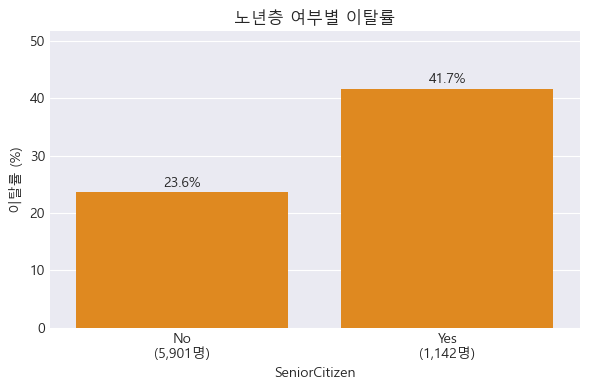

In [103]:
plt.figure(figsize=(6, 4))
SeniorCitizen_churn = df[df['SeniorCitizen'] != 'No internet service'].groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack().fillna(0)['Yes'] * 100
ax = sns.barplot(x=SeniorCitizen_churn.index, y=SeniorCitizen_churn.values, color=custom_palette[7])

ax.set_xticklabels(['No\n(5,901명)', 'Yes\n(1,142명)'])
plt.title('노년층 여부별 이탈률')
plt.ylabel('이탈률 (%)')
for i, val in enumerate(SeniorCitizen_churn.values):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')
plt.ylim(0, SeniorCitizen_churn.max() + 10)
plt.tight_layout()
plt.show()

In [113]:
# 월 청구 요금 구간화
def charge_group(x):
    if x < 50:
        return '저요금 ₩30 미만'
    elif x < 80:
        return '중요금 ₩30~₩80'
    else:
        return '고요금 ₩80 이상'

df['MonthlyChargesGroup'] = df['MonthlyCharges'].apply(charge_group)

In [114]:
df.groupby('MonthlyChargesGroup')['Churn_num'].mean().reset_index()

,MonthlyChargesGroup,Churn_num
0,고요금 ₩80 이상,0.34
1,저요금 ₩30 미만,0.16
2,중요금 ₩30~₩80,0.29


C:\Users\sangw\AppData\Local\Temp\ipykernel_28916\925400789.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_group = df.groupby('MonthlyChargesGroup')['Churn_num'].mean().reset_index()


<Figure size 600x400 with 0 Axes>

C:\Users\sangw\AppData\Local\Temp\ipykernel_28916\925400789.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_by_group, x='MonthlyChargesGroup', y='Churn_num', palette='Blues_d')


<Axes: xlabel='MonthlyChargesGroup', ylabel='Churn_num'>

Text(0.5, 1.0, '월 청구 요금 구간별 이탈률')

Text(0, 0.5, '이탈률 (%)')

Text(0.5, 0, '월 청구 요금 구간')

(0.0, 38.99327605528576)

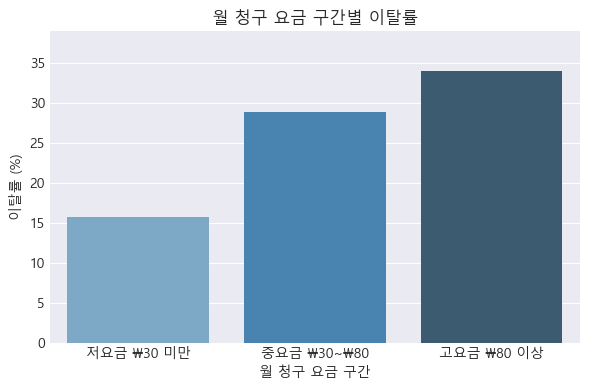

In [118]:
# 월 청구 요금 구간화
def charge_group(x):
    if x < 50:
        return '저요금 ₩30 미만'
    elif x < 80:
        return '중요금 ₩30~₩80'
    else:
        return '고요금 ₩80 이상'

df['MonthlyChargesGroup'] = df['MonthlyCharges'].apply(charge_group)
df['MonthlyChargesGroup'] = pd.Categorical(df['MonthlyChargesGroup'], categories=['저요금 ₩30 미만', '중요금 ₩30~₩80', '고요금 ₩80 이상'], ordered=True)

# 이탈률 계산
churn_by_group = df.groupby('MonthlyChargesGroup')['Churn_num'].mean().reset_index()
churn_by_group['Churn_num'] = churn_by_group['Churn_num'] * 100  # 퍼센트로

# 시각화
plt.figure(figsize=(6,4))
sns.barplot(data=churn_by_group, x='MonthlyChargesGroup', y='Churn_num', palette='Blues_d')
plt.title('월 청구 요금 구간별 이탈률')
plt.ylabel('이탈률 (%)')
plt.xlabel('월 청구 요금 구간')
plt.ylim(0, churn_by_group['Churn_num'].max() + 5)
plt.tight_layout()
plt.show()

# 2. 이탈 요인 분석

In [1]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
# 입력 변수 / 타겟 변수
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [23]:
# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 최적 변수 선택: Lasso Logistic

In [112]:
# 1차 Lasso 로지스틱 회귀 (L1 규제)
lasso1 = LogisticRegressionCV(
    penalty='l1',
    solver='saga',
    Cs=10,
    cv=5,
    max_iter=5000,
    scoring='roc_auc',
    random_state=42
)
lasso1.fit(X_scaled, y)

# 계수 추출
coefs1 = lasso1.coef_[0]
selected_mask = coefs1 != 0  # 계수가 0이 아닌 변수 마스크
selected_features = X.columns[selected_mask]

print(f"🔹 1차 Lasso에서 선택된 변수 개수: {len(selected_features)}")
print(f"🔹 선택된 변수 목록:\n{selected_features.tolist()}")

LogisticRegressionCV(cv=5, max_iter=5000, penalty='l1', random_state=42,
                     scoring='roc_auc', solver='saga')

🔹 1차 Lasso에서 선택된 변수 개수: 19
🔹 선택된 변수 목록:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [114]:
# 선택된 변수만 다시 학습용 데이터로 추출
X_selected = X[selected_features]
X_selected_scaled = scaler.fit_transform(X_selected)

# 2차 Lasso 로지스틱 회귀
lasso2 = LogisticRegressionCV(
    penalty='l1',
    solver='saga',
    Cs=10,
    cv=5,
    max_iter=5000,
    scoring='roc_auc',
    random_state=42
)
lasso2.fit(X_selected_scaled, y)

# 중요 변수 출력 (절댓값 > 0.01 기준)
coefs2 = lasso2.coef_[0]
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefs2
})
coef_df['RoundedAbs'] = np.round(np.abs(coef_df['Coefficient']), 2)

important_coefs = coef_df[coef_df['RoundedAbs'] > 0.01].sort_values(by='RoundedAbs', ascending=False)

print("\n2차 Lasso에서 중요 변수 (|계수| > 0.01):")
print(important_coefs)

LogisticRegressionCV(cv=5, max_iter=5000, penalty='l1', random_state=42,
                     scoring='roc_auc', solver='saga')


2차 Lasso에서 중요 변수 (|계수| > 0.01):
             Feature  Coefficient  RoundedAbs
4             tenure        -1.43        1.43
17    MonthlyCharges         0.69        0.69
18      TotalCharges         0.68        0.68
14          Contract        -0.59        0.59
5       PhoneService        -0.30        0.30
8     OnlineSecurity        -0.23        0.23
11       TechSupport        -0.23        0.23
15  PaperlessBilling         0.18        0.18
7    InternetService         0.17        0.17
9       OnlineBackup        -0.13        0.13
1      SeniorCitizen         0.09        0.09
3         Dependents        -0.08        0.08
10  DeviceProtection        -0.08        0.08
6      MultipleLines         0.07        0.07
16     PaymentMethod         0.05        0.05


In [115]:
important_coefs

,Feature,Coefficient,RoundedAbs
4,tenure,-1.43,1.43
17,MonthlyCharges,0.69,0.69
18,TotalCharges,0.68,0.68
14,Contract,-0.59,0.59
5,PhoneService,-0.30,0.30
8,OnlineSecurity,-0.23,0.23
11,TechSupport,-0.23,0.23
15,PaperlessBilling,0.18,0.18
7,InternetService,0.17,0.17
9,OnlineBackup,-0.13,0.13


## 선택된 변수 기반 단순 로지스틱 회귀 (해석 중심)

In [116]:
import statsmodels.api as sm

In [120]:
# 🔹 최종 선택된 변수만 추출
final_features = important_coefs['Feature'].tolist()
X_final = X[final_features]  # X는 원래 더미 처리된 데이터프레임

# 🔹 상수항 추가 (절대 필요)
X_final_const = sm.add_constant(X_final)

# 🔹 statsmodels 로지스틱 회귀 (Logit)
logit_model = sm.Logit(y, X_final_const)
result = logit_model.fit()

# 🔹 회귀 결과 요약 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.415794
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7027
Method:                           MLE   Df Model:                           15
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                  0.2814
Time:                        13:14:54   Log-Likelihood:                -2928.4
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5127      0.184     -2.788      0.005      -0.873      -0.152
tenure     

In [117]:
# ElasticNet을 통해 추출한 변수만 선택
selected_vars = important_coefs['Feature']
X_selected = df[selected_vars]
y = df["Churn"]

In [118]:
# 회귀 모델 학습
X_selected = sm.add_constant(X_selected)  # 상수항 추가
logistic = sm.Logit(y, X_selected)
logistic_result = logistic.fit()

Optimization terminated successfully.
         Current function value: 0.415794
         Iterations 8


In [119]:
print(logistic_result.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7027
Method:                           MLE   Df Model:                           15
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                  0.2814
Time:                        13:13:59   Log-Likelihood:                -2928.4
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5127      0.184     -2.788      0.005      -0.873      -0.152
tenure              -0.0588      0.006     -9.542      0.000      -0.071      -0.047
MonthlyCharges       0.0229 

## 이탈 확률 계산 및 성능 평가

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='RiskGroup'>

Text(0.5, 1.0, '이탈 위험군 분포 (Cutoff: 0.5)')

Text(0, 0.5, '고객 수')

Text(0.5, 0, '고객 이탈 위험군')

(array([0, 1]), [Text(0, 0, '저위험군'), Text(1, 0, '고위험군')])

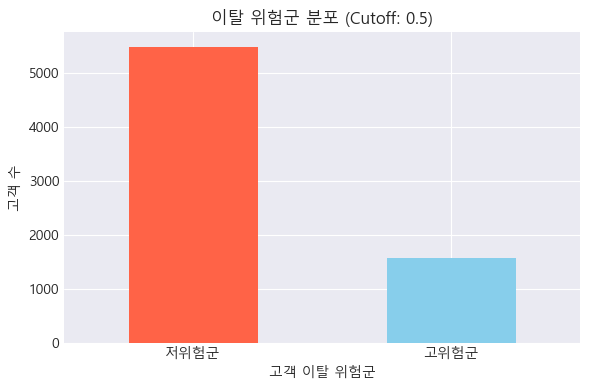

In [45]:
# 예측 확률 계산
pred_probs = logistic_result.predict(X_selected)
df["Churn_Prob"] = pred_probs
df["RiskGroup"] = (pred_probs >= 0.5).map({True: "고위험군", False: "저위험군"})

# 분포 시각화
plt.figure(figsize=(6, 4))
risk_counts = df["RiskGroup"].value_counts()

risk_counts.plot(kind="bar", color=["tomato", "skyblue"])
plt.title("이탈 위험군 분포 (Cutoff: 0.5)")
plt.ylabel("고객 수")
plt.xlabel("고객 이탈 위험군")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [56]:
(df['Churn_Prob'] > 0.5).sum() / df.shape[0]

0.222774385915093

In [46]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# 예측 확률 기반 이진 분류 (0.5 기준)
y_pred = (df["Churn_Prob"] >= 0.5).astype(int)

# 성능 평가 지표 계산
auc = roc_auc_score(y, df["Churn_Prob"])
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# 출력
print(f"AUC: {auc:.3f}")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

AUC: 0.847
Accuracy: 0.804
Precision: 0.655
Recall: 0.550
F1 Score: 0.598


# 3. 고객 유지기간 분석 (생존 분석)

In [8]:
from lifelines import KaplanMeierFitter

## Kaplan-Meier 생존분석

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7043 total observations, 5174 right-censored observations>

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='timeline'>

Text(0.5, 1.0, '전체 고객 생존 곡선')

Text(0.5, 0, '유지 개월 수')

Text(0, 0.5, '생존 확률')

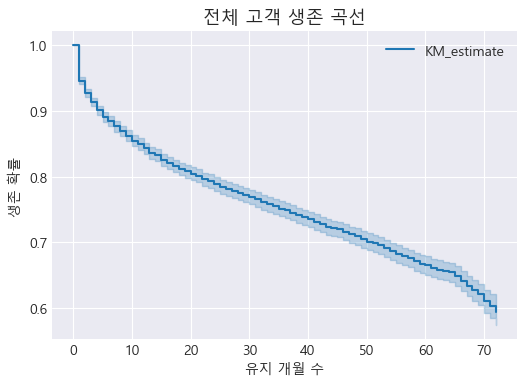

In [65]:
kmf = KaplanMeierFitter()

# 전체 생존곡선
kmf.fit(durations=df['tenure'], event_observed=df['Churn'])
plt.figure(figsize=(6, 4))
kmf.plot_survival_function()
plt.title("전체 고객 생존 곡선", fontdict=dict(fontsize=13))
plt.xlabel("유지 개월 수")
plt.ylabel("생존 확률")
plt.show()

<Figure size 500x400 with 0 Axes>

<lifelines.KaplanMeierFitter:"Month-to-month", fitted with 3875 total observations, 2220 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"One year", fitted with 1473 total observations, 1307 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"Two year", fitted with 1695 total observations, 1647 right-censored observations>

<Axes: xlabel='timeline'>

Text(0.5, 1.0, '계약 유형별 생존 곡선')

Text(0.5, 0, '유지 개월 수')

Text(0, 0.5, '생존 확률')

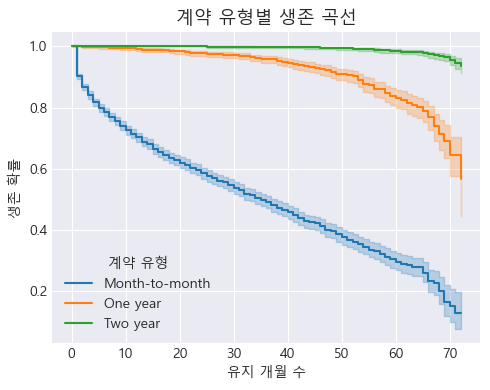

In [73]:
# Label Encoding된 계약 유형을 해석 가능한 이름으로 매핑
contract_map = {
    0: "Month-to-month",
    1: "One year",
    2: "Two year"
}
df['Contract_Label'] = df['Contract'].map(contract_map)

# Kaplan-Meier 생존곡선 그리기
kmf = KaplanMeierFitter()

plt.figure(figsize=(5, 4))

for group in df['Contract_Label'].unique():
    ix = df['Contract_Label'] == group
    kmf.fit(df.loc[ix, 'tenure'], event_observed=df.loc[ix, 'Churn'], label=group)
    kmf.plot_survival_function()

plt.title("계약 유형별 생존 곡선", fontsize=13)
plt.xlabel("유지 개월 수")
plt.ylabel("생존 확률")
plt.legend(title="계약 유형")
plt.tight_layout()
plt.show()


In [101]:
# 라벨 인코딩된 변수 해석용 매핑
label_maps = {
    'Contract': {0: 'Month-to-month', 1: 'One year', 2: 'Two year'},
    'PhoneService': {0: 'No', 1: 'Yes'},
    'OnlineSecurity': {0: 'No', 2: 'Yes', 1:'Yes'},
    'TechSupport': {0: 'No', 2: 'Yes', 1:'Yes'},
    'PaperlessBilling': {0: 'No', 1: 'Yes'},
    'InternetService': {0: 'DSL', 1: 'Fiber optic', 2: 'No'},
    'OnlineBackup': {0: 'No', 2: 'Yes', 1:'Other'},
    'SeniorCitizen': {0: 'Not Senior', 1: 'Senior'},
    'DeviceProtection': {0: 'No', 2: 'Yes', 1: 'Other'},
    'Dependents': {0: 'No', 1: 'Yes'}
}


In [102]:
def plot_km_by_group(df, variable, label_map=None):
    plt.figure(figsize=(5, 4))
    kmf = KaplanMeierFitter()

    # 레이블 적용
    if label_map:
        df[f"{variable}_label"] = df[variable].map(label_map)
        groups = df[f"{variable}_label"].unique()
        label_column = f"{variable}_label"
    else:
        groups = df[variable].unique()
        label_column = variable

    # 그룹별 생존곡선
    for group in groups:
        ix = df[label_column] == group
        kmf.fit(df.loc[ix, 'tenure'], event_observed=df.loc[ix, 'Churn'], label=str(group))
        kmf.plot_survival_function()

    plt.title(f"{variable} 별 생존 곡선")
    plt.xlabel("유지 개월 수")
    plt.ylabel("생존 확률")
    plt.legend(title=variable)
    plt.tight_layout()
    plt.show()

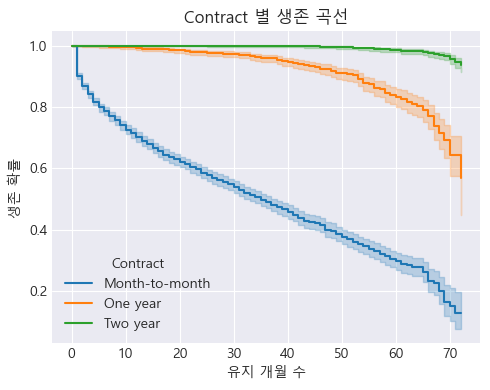

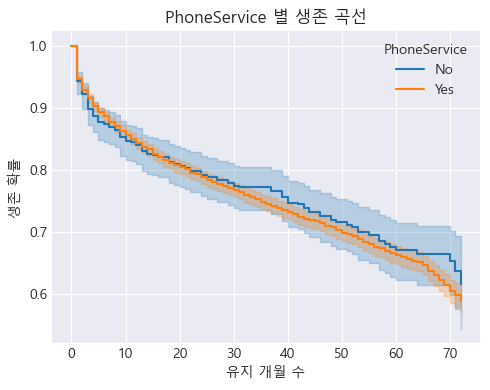

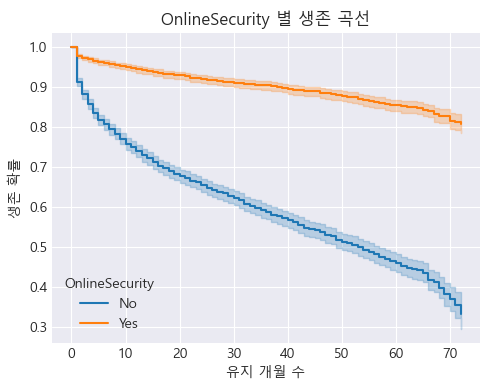

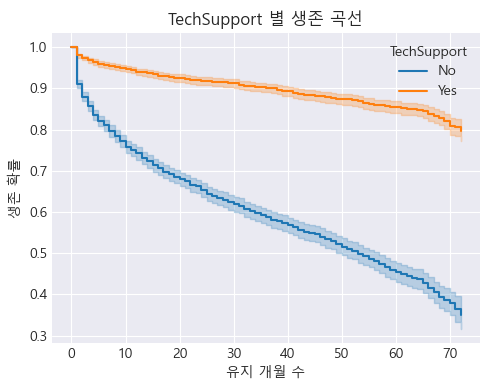

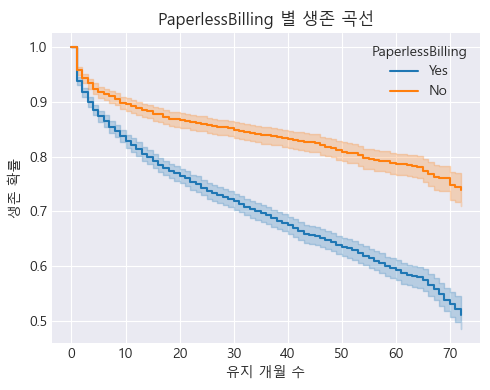

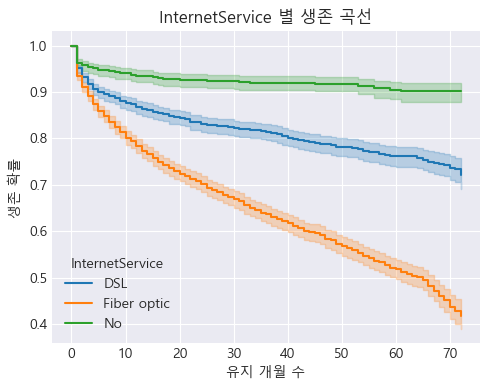

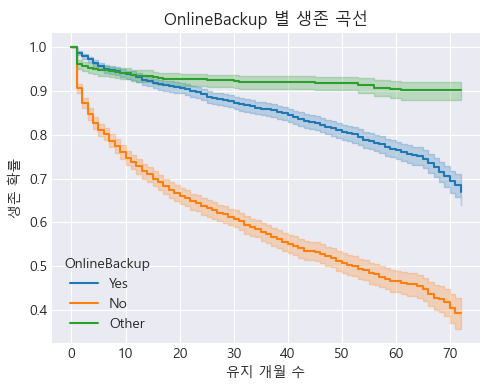

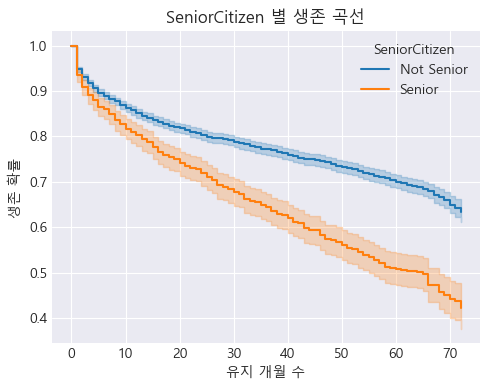

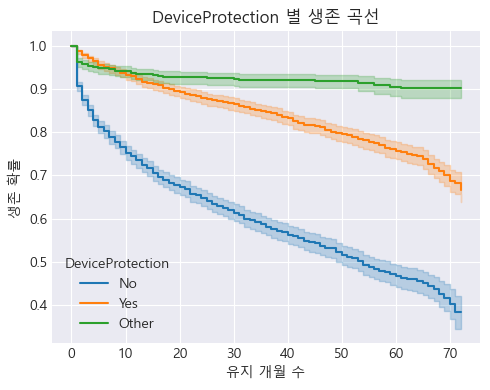

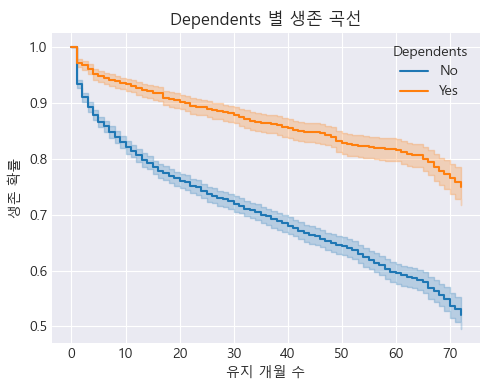

In [103]:
# 분석 변수 리스트
variables = [
    'Contract', 'PhoneService', 'OnlineSecurity', 'TechSupport',
    'PaperlessBilling', 'InternetService', 'OnlineBackup',
    'SeniorCitizen', 'DeviceProtection', 'Dependents'
]

# 실행
for var in variables:
    mapping = label_maps.get(var)
    plot_km_by_group(df, var, label_map=mapping)

<Figure size 500x400 with 0 Axes>

<lifelines.KaplanMeierFitter:"저요금 (≤50)", fitted with 2299 total observations, 1938 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"중요금 (50~80)", fitted with 2078 total observations, 1476 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"고요금 (80↑)", fitted with 2666 total observations, 1760 right-censored observations>

<Axes: xlabel='timeline'>

Text(0.5, 1.0, '월 청구 요금 구간별 생존 곡선')

Text(0.5, 0, '유지 개월 수')

Text(0, 0.5, '생존 확률')

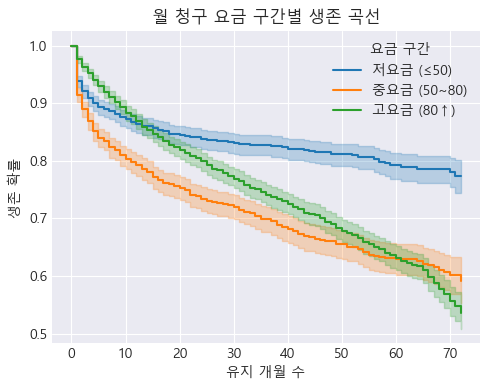

In [104]:
# 요금 구간 설정 (구간 수는 자유롭게 조절 가능)
df['MonthlyChargeGroup'] = pd.cut(
    df['MonthlyCharges'],
    bins=[0, 50, 80, df['MonthlyCharges'].max()],
    labels=['저요금 (≤50)', '중요금 (50~80)', '고요금 (80↑)']
)

plt.figure(figsize=(5, 4))
kmf = KaplanMeierFitter()

for group in df['MonthlyChargeGroup'].unique():
    ix = df['MonthlyChargeGroup'] == group
    kmf.fit(df.loc[ix, 'tenure'], event_observed=df.loc[ix, 'Churn'], label=group)
    kmf.plot_survival_function()

plt.title("월 청구 요금 구간별 생존 곡선")
plt.xlabel("유지 개월 수")
plt.ylabel("생존 확률")
plt.legend(title="요금 구간")
plt.tight_layout()
plt.show()


## AFT 생존분석

In [ ]:
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter

In [10]:
## 데이터 준비
# AFT 모형에서 사용할 변수 선정
final_features = ['Contract', 'Dependents', 'PaperlessBilling', 'SeniorCitizen', 'OnlineSecurity', 'TechSupport']

In [11]:
## 전처리
df_aft = origin_df.copy()

df_aft.columns = df_aft.columns.str.strip()  # 공백 제거

# 이탈 여부 이진화
df_aft["Churn"] = df_aft["Churn"].map({"Yes": 1, "No": 0})

# 불필요한 ID 컬럼 제거
df_aft.drop(columns=["customerID"], inplace=True)

In [12]:
# 더미변수화 (범주형만)
X = pd.get_dummies(df_aft[final_features], drop_first=True)

# 생존 분석용 데이터 구성
aft_df = pd.concat([df_aft[['tenure', 'Churn']], X], axis=1)

In [13]:
# 'tenure'는 생존 시간, 'Churn'은 이벤트 발생 여부
duration_col = 'tenure'
event_col = 'Churn'

In [14]:
# 서비스 이용기간이 0개월 이상인 고객만 필터링 (생존기간이 0개월인 고객은 실질적인 사용 이력이 거의 없는 이탈 고객)
aft_df = aft_df[aft_df['tenure'] >0]

In [15]:
## 분포별 AFT 모형 적합 및 AIC 비교
# 분포별 모델 학습 및 AIC 비교
models = {
    "Weibull": WeibullAFTFitter(),
    "Log-normal": LogNormalAFTFitter(),
    "Log-logistic": LogLogisticAFTFitter()
}

aic_scores = {}

for name, model in models.items():
    model.fit(aft_df, duration_col=duration_col, event_col=event_col)
    aic_scores[name] = model.AIC_

# AIC 출력
aic_df = pd.DataFrame.from_dict(aic_scores, orient='index', columns=['AIC']).sort_values(by='AIC')
print("모형별 AIC 비교:")
print(aic_df)

<lifelines.WeibullAFTFitter: fitted with 7032 total observations, 5163 right-censored observations>

d:\Coding\envs\sw_basic_env\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `LogNormalAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)


<lifelines.LogNormalAFTFitter: fitted with 7032 total observations, 5163 right-censored observations>

d:\Coding\envs\sw_basic_env\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `LogLogisticAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)


<lifelines.LogLogisticAFTFitter: fitted with 7032 total observations, 5163 right-censored observations>

모형별 AIC 비교:
                  AIC
Log-normal   18233.31
Log-logistic 18360.66
Weibull      18403.01


In [16]:
## 최종 생존 분석 모형: Log-normal AFT 모형

# 모형 적합
aft = LogNormalAFTFitter()
aft.fit(aft_df, duration_col='tenure', event_col='Churn')

# 결과 요약 정리
summary = aft.summary.copy()

# Time Ratio 계산 (exp(coef)) 추가
summary['Time Ratio (exp(coef))'] = np.exp(summary['coef'])

d:\Coding\envs\sw_basic_env\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `LogNormalAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)


<lifelines.LogNormalAFTFitter: fitted with 7032 total observations, 5163 right-censored observations>

In [17]:
summary

coef  exp(coef)  se(coef)  \
param  covariate                                                       
mu_    Contract_One year                   2.37      10.69      0.09   
       Contract_Two year                   3.56      35.30      0.13   
       Dependents_Yes                      0.45       1.57      0.08   
       OnlineSecurity_No internet service  0.41       1.50      0.05   
       OnlineSecurity_Yes                  0.93       2.53      0.08   
       PaperlessBilling_Yes               -0.09       0.91      0.07   
       SeniorCitizen                       0.24       1.28      0.08   
       TechSupport_No internet service     0.41       1.50      0.05   
       TechSupport_Yes                     0.65       1.91      0.08   
       Intercept                           2.87      17.62      0.07   
sigma_ Intercept                           0.57       1.76      0.02   

                                           coef lower 95%  coef upper 95%  \
param  covariate                                                            
mu_    Contract_One year                             2.19            2.55   
       Contract_Two year                             3.30            3.82   
       Dependents_Yes                                0.30            0.60   
       OnlineSecurity_No internet service            0.30            0.51   
       OnlineSecurity_Yes                            0.77            1.08   
       PaperlessBilling_Yes                         -0.23            0.04   
       SeniorCitizen                                 0.09            0.39   
       TechSupport_No internet service               0.30            0.51   
       TechSupport_Yes                               0.49            0.80   
       Intercept                                     2.73            3.01   
sigma_ Intercept                                     0.53            0.60   

                                           exp(coef) lower 95%  \
param  covariate                                                 
mu_    Contract_One year                                  8.93   
       Contract_Two year                                 27.22   
       Dependents_Yes                                     1.35   
       OnlineSecurity_No internet service                 1.35   
       OnlineSecurity_Yes                                 2.17   
       PaperlessBilling_Yes                               0.80   
       SeniorCitizen                                      1.10   
       TechSupport_No internet service                    1.35   
       TechSupport_Yes                                    1.64   
       Intercept                                         15.31   
sigma_ Intercept                                          1.70   

                                           exp(coef) upper 95%  cmp to     z  \
param  covariate                                                               
mu_    Contract_One year                                 12.80    0.00 25.81   
       Contract_Two year                                 45.78    0.00 26.87   
       Dependents_Yes                                     1.82    0.00  5.95   
       OnlineSecurity_No internet service                 1.67    0.00  7.51   
       OnlineSecurity_Yes                                 2.95    0.00 11.70   
       PaperlessBilling_Yes                               1.04    0.00 -1.38   
       SeniorCitizen                                      1.48    0.00  3.21   
       TechSupport_No internet service                    1.67    0.00  7.51   
       TechSupport_Yes                                    2.24    0.00  8.15   
       Intercept                                         20.28    0.00 40.00   
sigma_ Intercept                                          1.82    0.00 32.79   

                                             p  -log2(p)  \
param  covariate                                           
mu_    Contract_One year                  0.00    485.50   
       Contract_Two year

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'AFT 계수 기반 생존곡선 시뮬레이션')

Text(0.5, 0, '유지 개월 수')

Text(0, 0.5, '생존 확률')

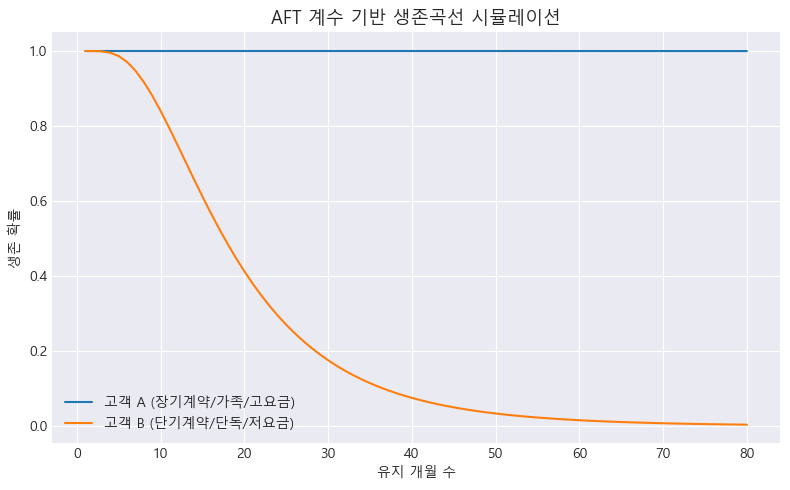

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import pandas as pd

# 주어진 계수값
coefficients = {
    'Contract_Two year': 3.56,
    'Contract_One year': 2.37,
    'Dependents_Yes': 0.45,
    'OnlineSecurity_No internet service': 0.41,
    'OnlineSecurity_Yes':0.93,
    'PaperlessBilling_Yes': -0.09,
    'SeniorCitizen': 0.24,
    'TechSupport_No internet service': 0.41,
    'TechSupport_Yes': 0.65,
    'Intercept': 2.87,
    'sigma_': 0.57
}

# 고객 A와 B의 변수 입력
sample = pd.DataFrame([
    {
        'Contract_Two year': 1,
        'Contract_One year': 0,
        'Dependents_Yes': 0,
        'OnlineSecurity_No internet service': 0,
        'OnlineSecurity_Yes': 0,
        'PaperlessBilling_Yes': 0,
        'SeniorCitizen': 0,
        'TechSupport_No internet service': 0,
        'TechSupport_Yes': 0,
    },
    {
        'Contract_Two year': 0,
        'Contract_One year': 0,
        'Dependents_Yes': 0,
        'OnlineSecurity_No internet service': 0,
        'OnlineSecurity_Yes': 0,
        'PaperlessBilling_Yes': 0,
        'SeniorCitizen': 0,
        'TechSupport_No internet service': 0,
        'TechSupport_Yes': 0,
    }
], index=['고객 A (장기계약/가족/고요금)', '고객 B (단기계약/단독/저요금)'])

# 생존곡선 계산 함수
def simulate_survival_curve(row, time_range):
    mu = coefficients['Intercept'] + sum(coefficients.get(k, 0) * row[k] for k in row.index)
    sigma = coefficients['sigma_']
    scale = np.exp(mu)
    return [1 - lognorm.cdf(t, s=sigma, scale=scale) for t in time_range]

# 시간 구간
time_range = np.arange(1, 81)

# 시뮬레이션 실행 및 시각화
plt.figure(figsize=(8, 5))
for name, row in sample.iterrows():
    survival = simulate_survival_curve(row, time_range)
    plt.plot(time_range, survival, label=name)

plt.title("AFT 계수 기반 생존곡선 시뮬레이션", fontsize=13)
plt.xlabel("유지 개월 수")
plt.ylabel("생존 확률")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 4. CoxPH 모형

In [22]:
from lifelines import CoxPHFitter

In [23]:
# 분석용 데이터세트 생성
df = origin_df.copy()

In [25]:
## 전처리
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  # 이탈 여부
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

# 요금 구간 변수 생성
def monthly_charge_group(x):
    if x < 50:
        return '저요금'
    elif x < 80:
        return '중요금'
    else:
        return '고요금'

df['MonthlyChargesGroup'] = df['MonthlyCharges'].apply(monthly_charge_group)

In [ ]:
# 분석용 변수 선택
selected_vars = [
    'tenure', 'Churn',
    'Contract', 'TechSupport', 'PaperlessBilling',
    'Dependents', 'SeniorCitizen', 'MonthlyChargesGroup'
]

df_cox = df[selected_vars]

In [28]:
## 더미 변수화
# 변수 범주 순성 지정
df_cox['Contract'] = pd.Categorical(df_cox['Contract'], categories=['Month-to-month', 'One year', 'Two year'])
df_cox['TechSupport'] = pd.Categorical(df_cox['TechSupport'], categories=['No', 'Yes'])
df_cox['PaperlessBilling'] = pd.Categorical(df_cox['PaperlessBilling'], categories=['No', 'Yes'])
df_cox['Dependents'] = pd.Categorical(df_cox['Dependents'], categories=['No', 'Yes'])
df_cox['MonthlyChargesGroup'] = pd.Categorical(df_cox['MonthlyChargesGroup'], categories=['저요금', '중요금', '고요금'])


df_cox = pd.get_dummies(df_cox, drop_first=True)

C:\Users\sangw\AppData\Local\Temp\ipykernel_28916\81542982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cox['Contract'] = pd.Categorical(df_cox['Contract'], categories=['Month-to-month', 'One year', 'Two year'])
C:\Users\sangw\AppData\Local\Temp\ipykernel_28916\81542982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cox['TechSupport'] = pd.Categorical(df_cox['TechSupport'], categories=['No', 'Yes'])
C:\Users\sangw\AppData\Local\Temp\ipykernel_28916\81542982.py:5: SettingWithCopyWarning: 
A

In [30]:
# 모델 적합
cph = CoxPHFitter()
cph.fit(df_cox, duration_col='tenure', event_col='Churn')

# 결과 출력
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -14264.69
         time fit was run = 2025-06-12 00:57:39 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
SeniorCitizen            -0.10       0.90       0.06            -0.21             0.01                 0.81                 1.01
Contract_One year        -2.04       0.13       0.08            -2.21            -1.88                 0.11                 0.15
Contract_Two year        -3.95       0.02       0.16            -4.26            -3.63                 0.01                 0.03
TechSupport_Yes          -0.51       0.60       0.06            -0.63            -0.38                 0.53                 0.68
PaperlessBilling_Yes      0.24       1.27       0.06             0.13             0.35                 1.14                 1.41
Dependents_Yes           -0.42       0.65       0.06            -0.55            -0.30                 0.58                 0.74
MonthlyChargesGroup_중요금   0.20       1.22       0.07             0.07             0.33                 1.07                 1.40
MonthlyChargesGroup_고요금  -0.05       0.96       0.07            -0.18             0.09                 0.84                 1.09

                          cmp to      z      p   -log2(p)
covariate                                                
SeniorCitizen               0.00  -1.85   0.06       3.96
Contract_One year           0.00 -24.05 <0.005     422.29
Contract_Two year           0.00 -24.81 <0.005     449.10
TechSupport_Yes             0.00  -7.87 <0.005      47.96
PaperlessBilling_Yes        0.00   4.26 <0.005      15.55
Dependents_Yes              0.00  -6.78 <0.005      36.31
MonthlyChargesGroup_중요금     0.00   2.91 <0.005       8.13
MonthlyChargesGroup_고요금     0.00  -0.68   0.49       1.02
---
Concordance = 0.82
Partial AIC = 28545.37
log-likelihood ratio test = 2776.71 on 8 df
-log2(p) of ll-ratio test = inf

In [31]:
## 모형 성능 진단
# Concordance Index (모형 예측력 지표, 0.5~1.0 사이)
print("Concordance Index:", cph.concordance_index_)

Concordance Index: 0.818018374735907


# 5. 클러스터링

In [51]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [53]:
# 클러스터링에 사용할 변수 선택
cluster_vars = ['Contract', 'TechSupport', 'PaperlessBilling', 'MonthlyChargesGroup', 'Dependents']

df_cluster = origin_df.copy()

# 요금 구간 변수 생성
def monthly_charge_group(x):
    if x < 50:
        return '저요금'
    elif x < 80:
        return '중요금'
    else:
        return '고요금'

df_cluster['MonthlyChargesGroup'] = df_cluster['MonthlyCharges'].apply(monthly_charge_group)
df_cluster = df_cluster[cluster_vars]

In [54]:
# 범주형 변수 카테고리 지정
df_cluster['Contract'] = pd.Categorical(df_cluster['Contract'], categories=['Month-to-month', 'One year', 'Two year'])
df_cluster['TechSupport'] = pd.Categorical(df_cluster['TechSupport'], categories=['No', 'Yes'])
df_cluster['Dependents'] = pd.Categorical(df_cluster['Dependents'], categories=['No', 'Yes'])
df_cluster['PaperlessBilling'] = pd.Categorical(df_cluster['PaperlessBilling'], categories=['No', 'Yes'])
df_cluster['MonthlyChargesGroup'] = pd.Categorical(df_cluster['MonthlyChargesGroup'], categories=['저요금', '중요금', '고요금'])

# 더미 변수화
df_cluster_dummies = pd.get_dummies(df_cluster, drop_first=True)

# 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_cluster_dummies)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

<Figure size 1000x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, '엘보우 플롯')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Inertia')

<Axes: >

Text(0.5, 1.0, '실루엣 스코어 플롯')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Score')

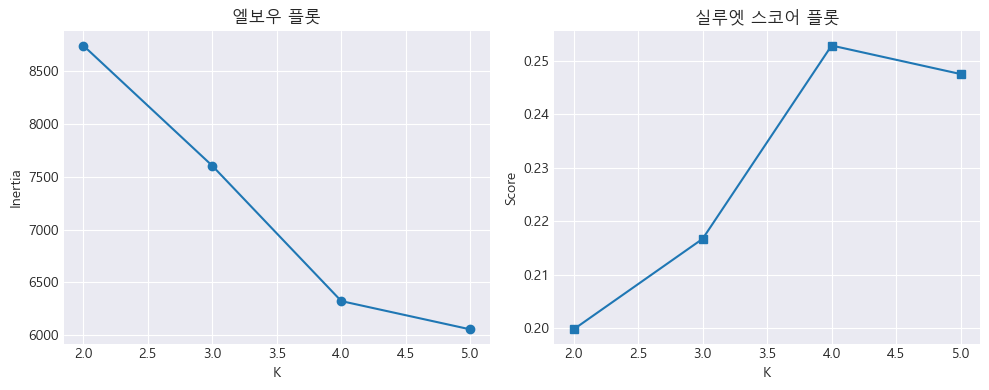

In [62]:
# 클러스터 수 결정: 엘보우 메서드 & 실루엣 스코어
inertia = []
silhouette = []
K_range = range(2, 6)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# 결과 시각화
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('엘보우 플롯')
plt.xlabel('K')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette, marker='s')
plt.title('실루엣 스코어 플롯')
plt.xlabel('K')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

In [56]:
df_cluster_dummies

,Contract_One year,Contract_Two year,TechSupport_Yes,PaperlessBilling_Yes,MonthlyChargesGroup_중요금,MonthlyChargesGroup_고요금,Dependents_Yes
0,False,False,False,True,False,False,False
1,True,False,False,False,True,False,False
2,False,False,False,True,True,False,False
3,True,False,True,False,False,False,False
4,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...
7038,True,False,True,True,False,True,True
7039,True,False,False,True,False,True,True
7040,False,False,False,True,False,False,True
7041,False,False,False,True,True,False,False


In [57]:
# 최종 클러스터링 (K=4)
kmeans_final = KMeans(n_clusters=4, random_state=802)
df_cluster_dummies['Cluster'] = kmeans_final.fit_predict(X_scaled)

# 클러스터별 특성 요약
df_cluster['Cluster'] = df_cluster_dummies['Cluster']
cluster_summary = df_cluster.groupby('Cluster').agg(lambda x: (x == 'Yes').mean() if x.dtype == 'object' else x.value_counts(normalize=True).get('Yes', 0)).round(2)
print(cluster_summary)

         Contract  TechSupport  PaperlessBilling  MonthlyChargesGroup  \
Cluster                                                                 
0               0         0.87              0.22                    0   
1               0         0.35              1.00                    0   
2               0         0.19              0.78                    0   
3               0         0.36              0.00                    0   

         Dependents  
Cluster              
0              0.39  
1              0.26  
2              0.22  
3              0.38  


In [61]:
df_cluster_dummies
df_cluster_dummies.groupby('Cluster').mean()

,Contract_One year,Contract_Two year,TechSupport_Yes,PaperlessBilling_Yes,MonthlyChargesGroup_중요금,MonthlyChargesGroup_고요금,Dependents_Yes,Cluster
0,False,False,False,True,False,False,False,1
1,True,False,False,False,True,False,False,0
2,False,False,False,True,True,False,False,2
3,True,False,True,False,False,False,False,0
4,False,False,False,True,True,False,False,2
...,...,...,...,...,...,...,...,...
7038,True,False,True,True,False,True,True,1
7039,True,False,False,True,False,True,True,1
7040,False,False,False,True,False,False,True,1
7041,False,False,False,True,True,False,False,2


,Contract_One year,Contract_Two year,TechSupport_Yes,PaperlessBilling_Yes,MonthlyChargesGroup_중요금,MonthlyChargesGroup_고요금,Dependents_Yes
Cluster,,,,,,,
0,0.65,0.20,0.87,0.22,0.84,0.10,0.39
1,0.19,0.21,0.29,1.00,0.00,0.70,0.26
2,0.07,0.13,0.19,0.78,1.00,0.00,0.22
3,0.19,0.38,0.16,0.00,0.01,0.29,0.38


In [47]:
cluster_summary

,Contract,TechSupport,PaperlessBilling,MonthlyChargesGroup,Dependents
Cluster,,,,,
0,0,0.87,0.22,0,0.39
1,0,0.35,1.00,0,0.26
2,0,0.19,0.78,0,0.22
3,0,0.36,0.00,0,0.38


<Figure size 800x600 with 0 Axes>

<lifelines.KaplanMeierFitter:"고객군 0", fitted with 692 total observations, 620 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"고객군 1", fitted with 2872 total observations, 1910 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"고객군 2", fitted with 1475 total observations, 933 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"고객군 3", fitted with 2004 total observations, 1711 right-censored observations>

<Axes: xlabel='timeline'>

Text(0.5, 1.0, '고객군별 생존 곡선 비교')

Text(0.5, 0, '유지 개월 수')

Text(0, 0.5, '생존 확률')

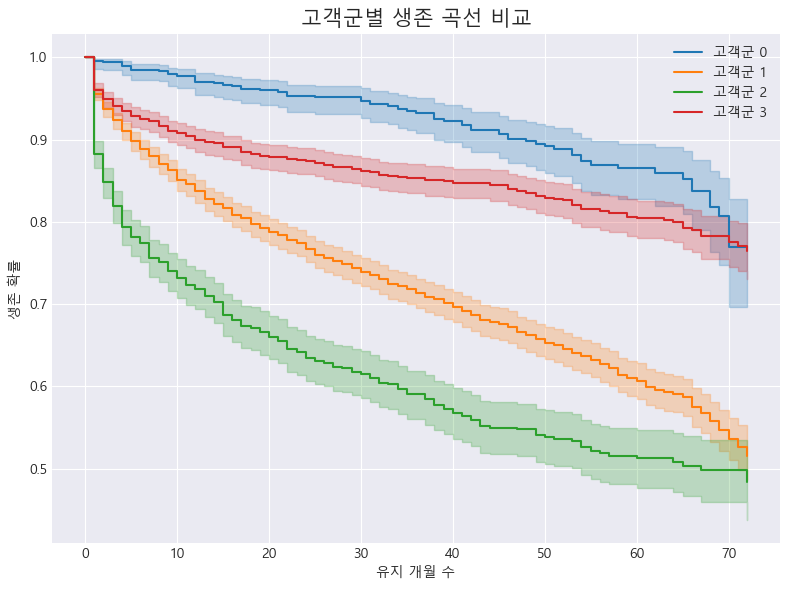

In [72]:
# 고객군 레이블 추가
df['Cluster'] = df_cluster_dummies['Cluster']
df['Cluster'] = df['Cluster'].map({0: '고객군 0', 1: '고객군 1', 2: '고객군 2', 3: '고객군 3'})

# 생존 곡선 시각화
kmf = KaplanMeierFitter()
plt.figure(figsize=(8, 6))

for cluster_id in sorted(df['Cluster'].unique()):
    mask = df['Cluster'] == cluster_id
    kmf.fit(
        durations=df.loc[mask, 'tenure'],
        event_observed=df.loc[mask, 'Churn'],
        label=f'{cluster_id}'
    )
    kmf.plot_survival_function(ci_show=True)

plt.title('고객군별 생존 곡선 비교', fontsize=15)
plt.xlabel('유지 개월 수')
plt.ylabel('생존 확률')
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesGroup,Cluster
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,저요금,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,중요금,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,중요금,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,저요금,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,중요금,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,고요금,1
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,고요금,1
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,저요금,1
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,중요금,2
